# QUIZ DATASET

# Quiz Dataset

# Importing the necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Data_for_UCI.csv to Data_for_UCI (1).csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Data_for_UCI.csv']))
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Data Pre-Processing

In [10]:
#dropping the "stab" column
df=df.drop("stab",axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [11]:
# let convert categorical variables into Numeric Variables using label encoder

from sklearn.preprocessing import LabelEncoder
Le =  LabelEncoder()
df['stab_f'] = Le.fit_transform(df['stabf']) 
df=df.drop("stabf",axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab_f
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [12]:
X=df.iloc[:,0:12]
Y = df['stab_f']
print(Y.shape)
print(X.shape)
print(df['stab_f'].value_counts())

(10000,)
(10000, 12)
1    6380
0    3620
Name: stab_f, dtype: int64


In [13]:
# dividing the datesets into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_train_df = scaler.fit_transform(X_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns=X_train.columns)


normalized_test_df = scaler.fit_transform(X_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=X_test.columns)


# Modeling

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

rf.fit(normalized_train_df,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [16]:
print(rf.score(normalized_train_df,y_train))
rf.score(normalized_test_df,y_test)

1.0


0.928

In [17]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

new_predictions = rf.predict(normalized_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[1, 0])
cnf_mat

array([[1232,   56],
       [  88,  624]])

In [18]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 4))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, normalized_train_df, y_train, cv=5, scoring='f1_macro')
print(scores)

f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('F1: {}'.format(round(f1*100), 4))

precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Precision: {}'.format(round(precision*100), 4))

recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Recall: {}'.format(round(recall*100), 4)) 

Accuracy: 93.0
[0.91143756 0.91136454 0.91564855 0.90214725 0.91555674]
F1: 94.0
Precision: 93.0
Recall: 96.0


### Extra Tree Classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
Ext= ExtraTreesClassifier(random_state=1)
Ext.fit(normalized_train_df,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [20]:
print(Ext.score(normalized_train_df,y_train))

Ext.score(normalized_test_df,y_test)

1.0


0.926

In [21]:

new_predictions = Ext.predict(normalized_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[1, 0])
cnf_mat

array([[1250,   38],
       [ 110,  602]])

In [22]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ext, normalized_train_df, y_train, cv=5, scoring='f1_macro')
print(scores)

f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('F1: {}'.format(round(f1*100), 2))

precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Precision: {}'.format(round(precision*100), 2))


recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Recall: {}'.format(round(recall*100), 2)) 

Accuracy: 93.0
[0.91104788 0.90890596 0.91695487 0.91218763 0.92433757]
F1: 94.0
Precision: 92.0
Recall: 97.0


# Feature Importance

[0.00849618 0.00781138 0.00784483 0.00737227 0.00357261 0.00342243
 0.00425292 0.00405073 0.00563857 0.00557401 0.00720446 0.00734609]


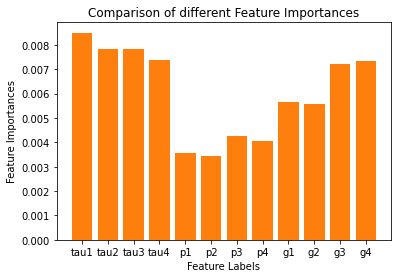

In [23]:
# Computing the importance of each feature 
feature_importance = Ext.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        Ext.estimators_], 
                                        axis = 0)

# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
print(feature_importance_normalized)
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

# LightGBM Model Development and Training


In [40]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state=1)
clf.fit(normalized_train_df,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [41]:
y_pred=clf.predict(normalized_test_df)
print(clf.score(normalized_train_df,y_train))

clf.score(normalized_test_df,y_test)

0.99825


0.9355

In [42]:

# view accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

0.9355

Confusion matrix

 [[ 635   77]
 [  52 1236]]

True Positives(TP) =  635

True Negatives(TN) =  1236

False Positives(FP) =  77

False Negatives(FN) =  52


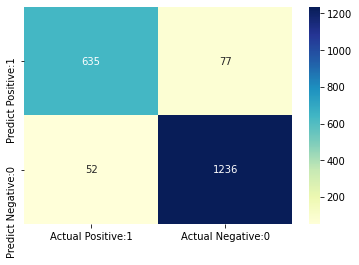

In [27]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# XGBoost Model Development and Training


In [28]:
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1)
model.fit(normalized_train_df,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
y_pred=model.predict(normalized_test_df)
print(model.score(normalized_train_df,y_train))

model.score(normalized_test_df,y_test)



0.951875


0.919

In [30]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 92.0


Confusion matrix

 [[ 599  113]
 [  49 1239]]

True Positives(TP) =  599

True Negatives(TN) =  1239

False Positives(FP) =  113

False Negatives(FN) =  49


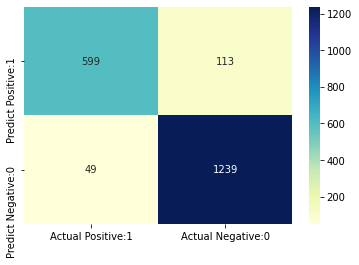

In [31]:
cm = confusion_matrix(y_test, y_pred)


print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# RandomizedCV_Search on the ExtraTreeClassifier

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# lets define the parameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}


### Define and Train the Model with Random Search

In [49]:
# create ExtraTreesClassifier model
Ext_model= ExtraTreesClassifier()

# set up random search meta-estimator
clf = RandomizedSearchCV(Ext_model, hyperparameter_grid, cv=5, n_iter=10, scoring='accuracy',n_jobs = -1, verbose=1,random_state=1)


# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(normalized_train_df,y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [50]:
# generate predictions using the best-performing model
predictions = model.predict(normalized_test_df)
print(model.score(normalized_train_df,y_train))

model.score(normalized_test_df,y_test)

0.98375


0.927

In [51]:
y_pred_train = model.predict(normalized_train_df)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

print(model.score(normalized_train_df,y_train))
model.score(normalized_test_df,y_test)

Training-set accuracy score: 0.9838
Accuracy: 93.0
0.98375


0.927

[[ 630   82]
 [  57 1231]]


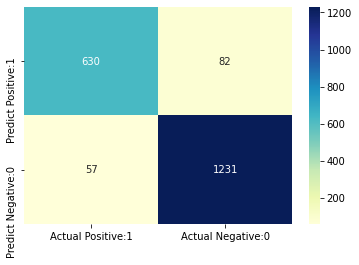

In [36]:
cm = confusion_matrix(y_test, predictions)

print(cm)



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Feature Importance


[0.13115456 0.12987142 0.12800565 0.12694129 0.1090518  0.10870433
 0.10572032 0.10098462 0.01522475 0.01515008 0.01496622 0.01422498]


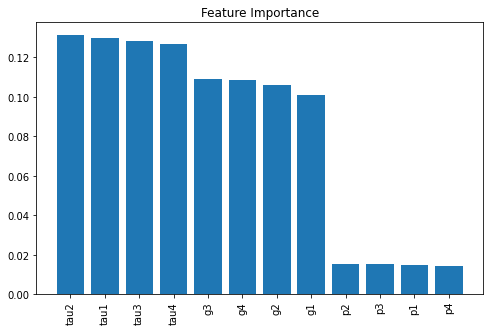

In [37]:
feature_importances = model.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [normalized_train_df.columns[i] for i in indices]

print(feature_importances[indices])
# Create plot
plt.figure(figsize=(8, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(normalized_train_df.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(normalized_train_df.shape[1]), names, rotation=90)

# Show plot
plt.show()